# Introduction to Neural Net

by: **Rodrigo Hernández Mota**
    
The _neural net_ package...

In [3]:
%matplotlib inline

from neural_net import *
import pandas as pd
import numpy as np

## Adaline 

Simple neuron with a linear regression as an activation function. 


We begin by creating a sample dataset: 

In [53]:
# create dataset
x_d = pd.DataFrame({'x1':np.arange(100)})
y_d = pd.DataFrame({'y':x_d.apply(lambda x: x[0] * np.random.rand(1)[0] + 0.01 * x[0] ** 2 + 10 * np.random.rand(1)[0], axis = 1)})

Now we initialize, train and evaluate the neuron.

In [54]:
# initialize, train and evaluate
neuron = adaline(x_data = x_d, y_data = y_d) 
neuron.train()
neuron.evaluate()

Proceed to plot the resutls. 

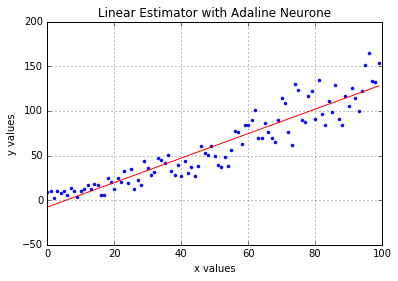

In [59]:
# plot results
import matplotlib.pyplot as plt
plt.figure()
plt.plot(neuron.x_data, neuron.y_data,'b.',
         neuron.x_data, neuron.y_estimate, 'r-')
plt.title('Linear Estimator with Adaline Neurone')
plt.xlabel('x values')
plt.ylabel('y values')
plt.grid()
plt.show()

Modify the input data to obtain a non-linear estimation.

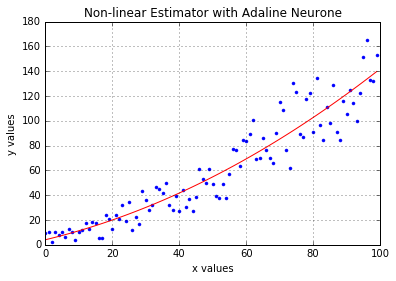

In [60]:
x_d2 = x_d.copy()
x_d2['x2'] = x_d2['x1'].apply(lambda x: x**2)

neuron_2 = adaline(x_data = x_d2, y_data = y_d) 
neuron_2.train()
neuron_2.evaluate()

plt.figure()
plt.plot(neuron.x_data, neuron_2.y_data,'b.',
         neuron.x_data, neuron_2.y_estimate, 'r-')
plt.title('Non-linear Estimator with Adaline Neurone')
plt.xlabel('x values')
plt.ylabel('y values')
plt.grid()
plt.show()

## Logistic regression 

[...]

Sample dataset:

In [62]:
# create dataset
x1 = 10 * np.random.rand(100)
x2 = 20 * np.random.rand(100) + 5
x_d = pd.DataFrame({'x1':x1, 'x2':x2})
mask = x_d.x2.values < 17
y_d = pd.DataFrame({'y':1. * (mask)})


Initialize, train and evaluate function. Plot the resutls.

In [63]:
neuron = simple_logistic(x_data = x_d, y_data = y_d)
neuron.train()
neuron.evaluate()


C:\Users\Rodrigo\Documents\github_rhdzmota\neural_net\neural_net.py:128: RuntimeWarning: divide by zero encountered in log
  J_log = lambda y, ye: sum(- y * np.log(ye) - (1-y) * np.log(1-ye))
C:\Users\Rodrigo\Documents\github_rhdzmota\neural_net\neural_net.py:128: RuntimeWarning: invalid value encountered in multiply
  J_log = lambda y, ye: sum(- y * np.log(ye) - (1-y) * np.log(1-ye))
C:\Users\Rodrigo\Documents\github_rhdzmota\neural_net\neural_net.py:128: RuntimeWarning: divide by zero encountered in log
  J_log = lambda y, ye: sum(- y * np.log(ye) - (1-y) * np.log(1-ye))
C:\Users\Rodrigo\Documents\github_rhdzmota\neural_net\neural_net.py:128: RuntimeWarning: invalid value encountered in multiply
  J_log = lambda y, ye: sum(- y * np.log(ye) - (1-y) * np.log(1-ye))


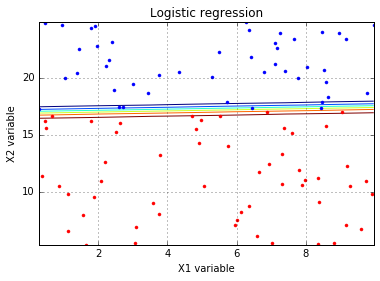

In [64]:
# plot the results 
g_x1 = np.linspace(min(x1), max(x1), 100)
g_x2 = np.linspace(min(x2), max(x2), 100)
mg1, mg2 = np.meshgrid(g_x1, g_x2)
r, c = np.shape(mg1)

gx1 = np.reshape(mg1, (r*c,))
gx2 = np.reshape(mg2, (r*c,))

pl_x = pd.DataFrame({'gx1':gx1, 'gx2':gx2})
pl_x
neuron.evaluate(x = pl_x)

y_est = np.reshape(neuron.probability.values, (r,c))

plt.figure()
plt.plot(x_d.iloc[mask].x1,x_d.iloc[mask].x2, 'r.',x_d.iloc[mask == 0].x1,x_d.iloc[mask == 0].x2, 'b.' )
plt.contour(g_x1,g_x2,y_est)
plt.title('Logistic regression')
plt.xlabel('X1 variable')
plt.ylabel('X2 variable')
plt.grid()
plt.show()
